In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Paired_12
import pandas as pd
import numpy as np
import joblib

x_train = pd.read_csv('../data/x_train_df.csv')
y_train = pd.read_csv('../data/y_train_df.csv')
x_test = pd.read_csv('../data/x_test_df.csv')
y_test = pd.read_csv('../data/y_test_df.csv')

x_train = np.array(x_train)
y_train = np.array(y_train).ravel() # to 1D
x_test = np.array(x_test)
y_test = np.array(y_test).ravel()

logistic regression

In [2]:
lr = LogisticRegression(random_state=42)
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}

grid_lr = GridSearchCV(
     estimator= lr,
     param_grid= param_grid_lr,
     scoring= 'recall'
)

grid_lr.fit(x_train, y_train)


"best score:", grid_lr.best_score_, "best parameters:", grid_lr.best_params_,


best_lr= grid_lr.best_estimator_

y_pred_lr = best_lr.predict(x_test)

ac_lr = accuracy_score(y_test,y_pred_lr)
pre_lr = precision_score(y_test, y_pred_lr)
re_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

ac_lr, pre_lr, re_lr, f1_lr



(0.9736842105263158,
 0.9545454545454546,
 0.9767441860465116,
 0.9655172413793104)

svm

In [4]:
svm = SVC(random_state=42)

param_grid_svm = {
    'C': [0.01, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
     estimator= svm,
     param_grid= param_grid_svm,
     scoring= 'recall'
)

grid_svm.fit(x_train, y_train)


"best score:", grid_svm.best_score_, "best parameters:", grid_svm.best_params_,

best_svm= grid_svm.best_estimator_

y_pred_svm = best_svm.predict(x_test)

ac_svm = accuracy_score(y_test,y_pred_svm)
pre_svm = precision_score(y_test, y_pred_svm)
re_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)


ac_svm, pre_svm, re_svm, f1_svm


(0.9736842105263158,
 0.9761904761904762,
 0.9534883720930233,
 0.9647058823529412)

random forest

In [5]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10],
    'min_samples_leaf': [1,2]
}

grid_rf = GridSearchCV(
     estimator= rf,
     param_grid= param_grid_rf,
     scoring= 'recall'
)

grid_rf.fit(x_train, y_train)


"best score:", grid_rf.best_score_, "best parameters:", grid_rf.best_params_

best_rf= grid_rf.best_estimator_

y_pred_rf = best_rf.predict(x_test)

ac_rf = accuracy_score(y_test,y_pred_rf)
pre_rf = precision_score(y_test, y_pred_rf)
re_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


ac_rf, pre_rf, re_rf, f1_rf


(0.9649122807017544, 0.975609756097561, 0.9302325581395349, 0.9523809523809523)

ANN

In [3]:
nn = MLPClassifier(random_state=42)

param_grid_nn = {
    'hidden_layer_sizes': [(32, ), (64, 32)],
    'activation': ['relu'],
    'max_iter': [1000]
}

grid_nn = GridSearchCV(
     estimator= nn,
     param_grid= param_grid_nn,
     scoring= 'recall'
    )

grid_nn.fit(x_train, y_train)



best_nn= grid_nn.best_estimator_

y_pred_nn = best_nn.predict(x_test)

ac_nn = accuracy_score(y_test,y_pred_nn)
pre_nn = precision_score(y_test, y_pred_nn)
re_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)


ac_nn, pre_nn, re_nn, f1_nn

(0.9824561403508771,
 0.9767441860465116,
 0.9767441860465116,
 0.9767441860465116)

In [4]:
joblib.dump(best_nn, '../pkl/best_model_ANN.pkl')

['../pkl/best_model_ANN.pkl']

results

In [8]:
results = pd.DataFrame({
     'Model': ['Logistic regression', 'SVM', 'Random forest', 'ANN'],
     'Accuracy': [ac_lr, ac_svm, ac_rf, ac_nn],
     'Precision': [pre_lr, pre_svm, pre_rf, pre_nn],
     'Recall': [re_lr, re_svm, re_rf, re_nn],
     'F1-score': [f1_lr, f1_svm, f1_rf, f1_nn]
 })

results = results.sort_values('Accuracy', ascending=False)
results = results.reset_index(drop=True)
results.to_csv("../data/results/results.csv", index=False)
results


,Model,Accuracy,Precision,Recall,F1-score
0,ANN,0.982456,0.976744,0.976744,0.976744
1,Logistic regression,0.973684,0.954545,0.976744,0.965517
2,SVM,0.973684,0.976190,0.953488,0.964706
3,Random forest,0.964912,0.975610,0.930233,0.952381


visualization

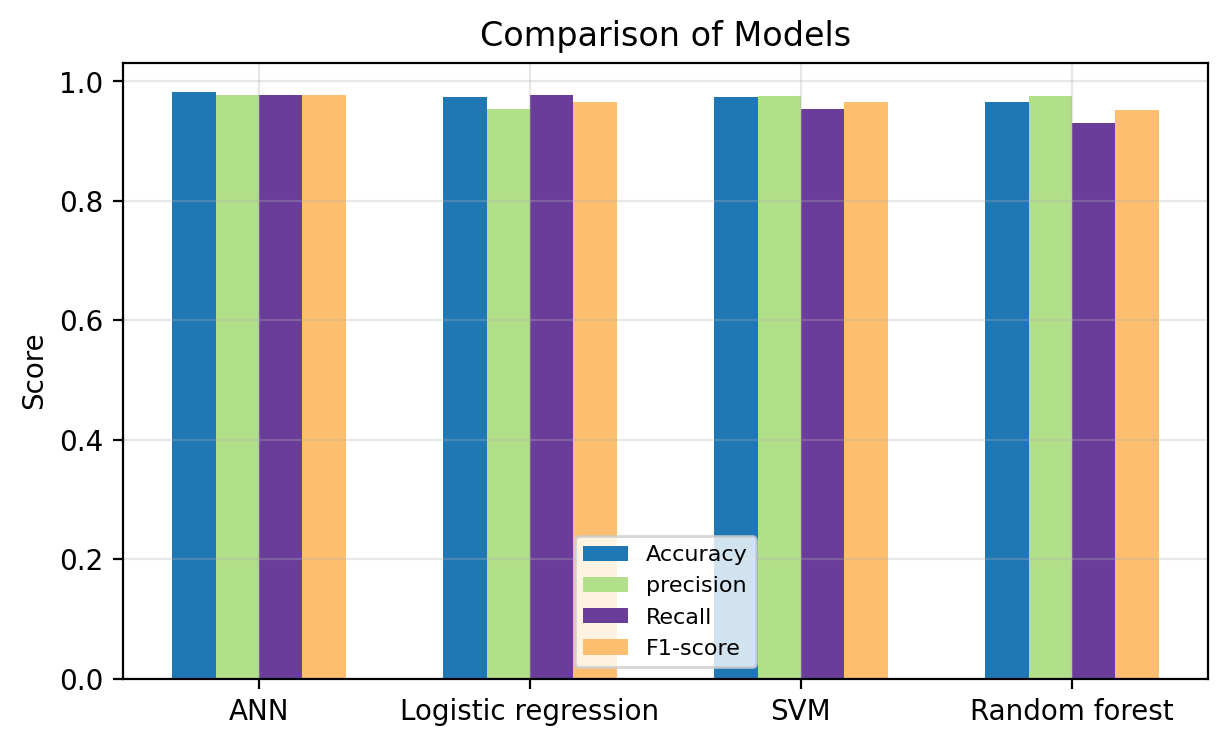

In [14]:
results = pd.read_csv('../data/results/results.csv')

my_width = 0.16
x = np.arange(len(results['Model']))
colors = Paired_12.mpl_colors
plt.figure(figsize=(7, 4) ,dpi=200)

plt.bar(x - my_width * 1.5, results['Accuracy'], width=my_width, label= 'Accuracy', color= colors[1])
plt.bar(x - my_width * 0.5, results['Precision'], width=my_width, label= 'precision', color= colors[2] )
plt.bar(x + my_width * 0.5, results['Recall'], width=my_width, label= 'Recall', color= colors[9])
plt.bar(x + my_width *1.5, results['F1-score'], width=my_width, label= 'F1-score', color= colors[6])
plt.xticks(x, results['Model'])

plt.legend()
plt.grid(alpha=0.3)
plt.legend(fontsize=8)
plt.ylabel("Score")
plt.title("Comparison of Models")
plt.savefig("../data/results/results.png")
plt.show()